In [13]:
import pandas as pd

# Đường dẫn tới file CSV trên Google Drive hoặc tải lên Colab
file_path = '/content/vietnamese_tiki_products_women_bags.csv'
data = pd.read_csv(file_path)

# Hiển thị 5 dòng đầu tiên
print(data.head())


   Unnamed: 0         id                                               name  \
0           0  259480018  Túi Xách Nữ Da Mềm Thời Trang Du Lịch Phong Cá...   
1           1  260801038  Túi Xách Đeo Vai  Kẹp Nách Đi Học Đi Chơi Thời...   
2           2  260800735  Túi Đeo Chéo Nữ Thời Trang Đi Làm Dự Tiệc Phon...   
3           3  260799998  Túi Đeo Chéo Nữ Chất Da Xịn Túi Du Lịch Đi Làm...   
4           4  259481422  Túi Xách Đeo Vai Túi Cầm Tay Nữ Đi Chơi Dự Tiệ...   

                                         description  original_price  price  \
0         Mô Tả Sản Phẩm:Túi Xách Nữ Da Mềm Thời ...           85000  85000   
1         Mô Tả Sản Phẩm:Túi Xách Đeo Vai Kẹp Nác...           89000  89000   
2         Mô Tả Sản Phẩm:Túi Đeo Chéo Nữ Thời Tra...           89000  89000   
3         SHOP LOTIBA   Mô Tả Sản Phẩm:Túi Đeo Ch...           89000  89000   
4         Mô Tả Sản Phẩm:Túi Xách Đeo Vai Túi Cầm...           89000  89000   

  fulfillment_type brand  review_count  rating_ave

In [14]:
# Thông tin chung về dữ liệu
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4325 non-null   int64  
 1   id                4325 non-null   int64  
 2   name              4325 non-null   object 
 3   description       4325 non-null   object 
 4   original_price    4325 non-null   int64  
 5   price             4325 non-null   int64  
 6   fulfillment_type  4325 non-null   object 
 7   brand             4325 non-null   object 
 8   review_count      4325 non-null   int64  
 9   rating_average    4325 non-null   float64
 10  favourite_count   4325 non-null   int64  
 11  pay_later         4325 non-null   bool   
 12  current_seller    4325 non-null   object 
 13  date_created      4325 non-null   int64  
 14  number_of_images  4325 non-null   int64  
 15  vnd_cashback      4325 non-null   int64  
 16  has_video         4325 non-null   bool   


In [15]:
# Kiểm tra số lượng giá trị thiếu
print(data.isnull().sum())


Unnamed: 0          0
id                  0
name                0
description         0
original_price      0
price               0
fulfillment_type    0
brand               0
review_count        0
rating_average      0
favourite_count     0
pay_later           0
current_seller      0
date_created        0
number_of_images    0
vnd_cashback        0
has_video           0
category            0
quantity_sold       0
dtype: int64


In [16]:
# Thống kê cơ bản
print(data.describe())



        Unnamed: 0            id  original_price         price  review_count  \
count  4325.000000  4.325000e+03    4.325000e+03  4.325000e+03   4325.000000   
mean   2162.000000  1.474194e+08    2.645045e+05  2.475288e+05      1.925780   
std    1248.664286  5.910208e+07    9.592046e+05  9.336393e+05     12.721735   
min       0.000000  1.754631e+06    0.000000e+00  0.000000e+00      0.000000   
25%    1081.000000  1.036602e+08    4.500000e+04  4.100000e+04      0.000000   
50%    2162.000000  1.525481e+08    7.500000e+04  6.900000e+04      0.000000   
75%    3243.000000  1.889031e+08    1.800000e+05  1.680000e+05      0.000000   
max    4324.000000  2.631973e+08    1.750000e+07  1.750000e+07    342.000000   

       rating_average  favourite_count  date_created  number_of_images  \
count     4325.000000           4325.0   4325.000000       4325.000000   
mean         1.012370              0.0    648.954682          6.104509   
std          1.901416              0.0    342.821621     

In [17]:
# Loại bỏ hàng chứa giá trị thiếu
data = data.dropna()

# Loại bỏ các giá trị trùng lặp
data = data.drop_duplicates()


In [23]:
# Thông tin chung về dữ liệu
print(data.nunique())


Unnamed: 0          4325
id                  4324
name                4032
description         3370
original_price       836
price                897
fulfillment_type       4
brand                186
review_count          68
rating_average        25
favourite_count        1
pay_later              2
current_seller       917
date_created        1001
number_of_images      26
vnd_cashback         427
has_video              2
category              14
quantity_sold        157
dtype: int64


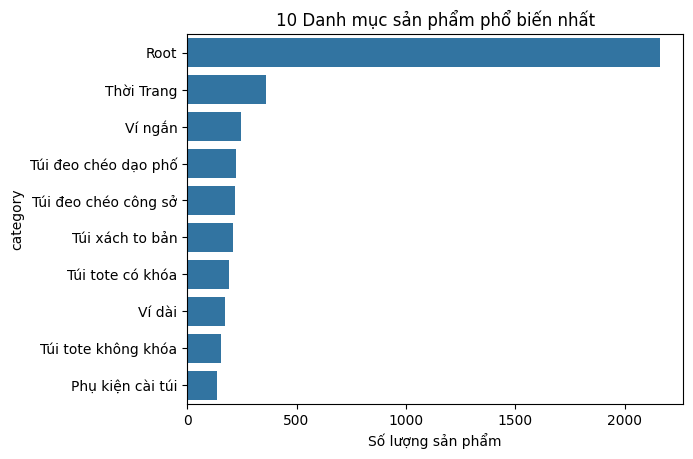

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thống kê danh mục sản phẩm và số lượng bán chạy
category_counts = data['category'].value_counts().head(10)  # Lấy 10 danh mục hàng đầu
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('10 Danh mục sản phẩm phổ biến nhất')
plt.xlabel('Số lượng sản phẩm')
plt.show()


In [24]:
women_bags = data.drop(columns = ['Unnamed: 0','id','name','description', 'current_seller'])
women_bags


,original_price,price,fulfillment_type,brand,review_count,rating_average,favourite_count,pay_later,date_created,number_of_images,vnd_cashback,has_video,category,quantity_sold
0,85000,85000,dropship,OEM,0,0.0,0,False,115,7,0,False,Root,0
1,89000,89000,dropship,OEM,0,0.0,0,False,112,9,2382,False,Root,0
2,89000,89000,dropship,OEM,0,0.0,0,False,112,7,2382,False,Root,0
3,89000,89000,dropship,OEM,0,0.0,0,False,112,3,2382,False,Root,0
4,89000,89000,dropship,OEM,0,0.0,0,False,115,9,0,False,Root,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,170000,170000,dropship,BIOLINE,0,0.0,0,True,824,10,0,False,Ví ngắn,0
4321,2180000,2180000,dropship,Efora,0,0.0,0,True,648,4,27151,False,Root,0
4322,63000,63000,dropship,OEM,0,0.0,0,False,644,10,1710,False,Root,0
4323,89000,89000,dropship,Forever Young,0,0.0,0,False,196,9,0,False,Ví ngắn,0


In [25]:
women_bags['bags'] = 1
women_bags['gender'] = 0

In [26]:
women_bags.category.value_counts()

,count
category,
Root,2159
Thời Trang,359
Ví ngắn,247
Túi đeo chéo dạo phố,224
Túi đeo chéo công sở,218
Túi xách to bản,210
Túi tote có khóa,193
Ví dài,175
Túi tote không khóa,155


In [27]:
def category_change(x):
    x = str(x)
    if x == 'Thời Trang':
        return 'Fashion'
    elif x == 'Ví ngắn':
        return 'Short wallet'
    elif x == 'Túi đeo chéo dạo phố':
        return 'Crossbody bag for walking around town'
    elif x == 'Túi đeo chéo công sở':
        return 'Office crossbody bag'
    elif x == 'Túi xách to bản':
        return 'Large handbag'
    elif x == 'Túi tote có khóa':
        return 'Tote bag with lock'
    elif x == 'Túi tote có khóa':
        return 'Tote bag with lock'
    elif x == 'Ví dài':
        return 'long wallet'
    elif x == 'Túi tote không khóa':
        return 'Unlocked tote bag'
    elif x == 'Phụ kiện cài túi': # 背包裝飾
        return
    elif x == 'Túi xách vừa và nhỏ':
        return 'Small and medium handbags'
    elif x == 'Túi thời trang nữ':
        return 'Women fashion bag'
    elif x =='Dây, quai đeo túi': # 背帶
        return
    elif x == 'Móc Khóa - Phụ Kiện Trang Trí': #鑰匙圈
        return
    elif x == 'Root':
        return 'Root'
    elif x =='Ví nam đứng':
        return 'Men standing wallet'
    elif x =='Ví nam ngang':
        return 'Men horizontal wallet'
    elif x == 'Túi xách công sở nam':
        return 'men office bag'
    elif x == 'Túi đeo chéo nam':
        return 'Men crossbody bag'
    elif x == 'Túi bao tử, túi đeo bụng':
        return 'Stomach bag'
    elif x == 'Ví nam':
        return 'wallet'
    elif x == 'Túi thời trang nam':
        return 'Men fashion bag'
    elif x == 'Balo nam':
        return 'men backpack'

In [28]:
women_bags['category'] = women_bags['category'].apply(category_change)
women_bags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   original_price    4325 non-null   int64  
 1   price             4325 non-null   int64  
 2   fulfillment_type  4325 non-null   object 
 3   brand             4325 non-null   object 
 4   review_count      4325 non-null   int64  
 5   rating_average    4325 non-null   float64
 6   favourite_count   4325 non-null   int64  
 7   pay_later         4325 non-null   bool   
 8   date_created      4325 non-null   int64  
 9   number_of_images  4325 non-null   int64  
 10  vnd_cashback      4325 non-null   int64  
 11  has_video         4325 non-null   bool   
 12  category          4151 non-null   object 
 13  quantity_sold     4325 non-null   int64  
 14  bags              4325 non-null   int64  
 15  gender            4325 non-null   int64  
dtypes: bool(2), float64(1), int64(10), object(

In [29]:
women_bags['category'].value_counts()

,count
category,
Root,2159
Fashion,359
Short wallet,247
Crossbody bag for walking around town,224
Office crossbody bag,218
Large handbag,210
Tote bag with lock,193
long wallet,175
Unlocked tote bag,155


In [30]:
women_bags.dropna(subset = ['category'], inplace = True)
women_bags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4151 entries, 0 to 4324
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   original_price    4151 non-null   int64  
 1   price             4151 non-null   int64  
 2   fulfillment_type  4151 non-null   object 
 3   brand             4151 non-null   object 
 4   review_count      4151 non-null   int64  
 5   rating_average    4151 non-null   float64
 6   favourite_count   4151 non-null   int64  
 7   pay_later         4151 non-null   bool   
 8   date_created      4151 non-null   int64  
 9   number_of_images  4151 non-null   int64  
 10  vnd_cashback      4151 non-null   int64  
 11  has_video         4151 non-null   bool   
 12  category          4151 non-null   object 
 13  quantity_sold     4151 non-null   int64  
 14  bags              4151 non-null   int64  
 15  gender            4151 non-null   int64  
dtypes: bool(2), float64(1), int64(10), object(3)
me

In [31]:
print(women_bags.describe())

       original_price         price  review_count  rating_average  \
count    4.151000e+03  4.151000e+03   4151.000000     4151.000000   
mean     2.675962e+05  2.500514e+05      1.988677        1.032137   
std      9.776640e+05  9.515774e+05     12.977241        1.913630   
min      0.000000e+00  0.000000e+00      0.000000        0.000000   
25%      4.500000e+04  4.112850e+04      0.000000        0.000000   
50%      7.500000e+04  6.900000e+04      0.000000        0.000000   
75%      1.800000e+05  1.650000e+05      0.000000        0.000000   
max      1.750000e+07  1.750000e+07    342.000000        5.000000   

       favourite_count  date_created  number_of_images   vnd_cashback  \
count           4151.0   4151.000000       4151.000000    4151.000000   
mean               0.0    654.422549          6.145025    1080.775717   
std                0.0    346.387515          3.441445    5487.138821   
min                0.0      0.000000          1.000000       0.000000   
25%          

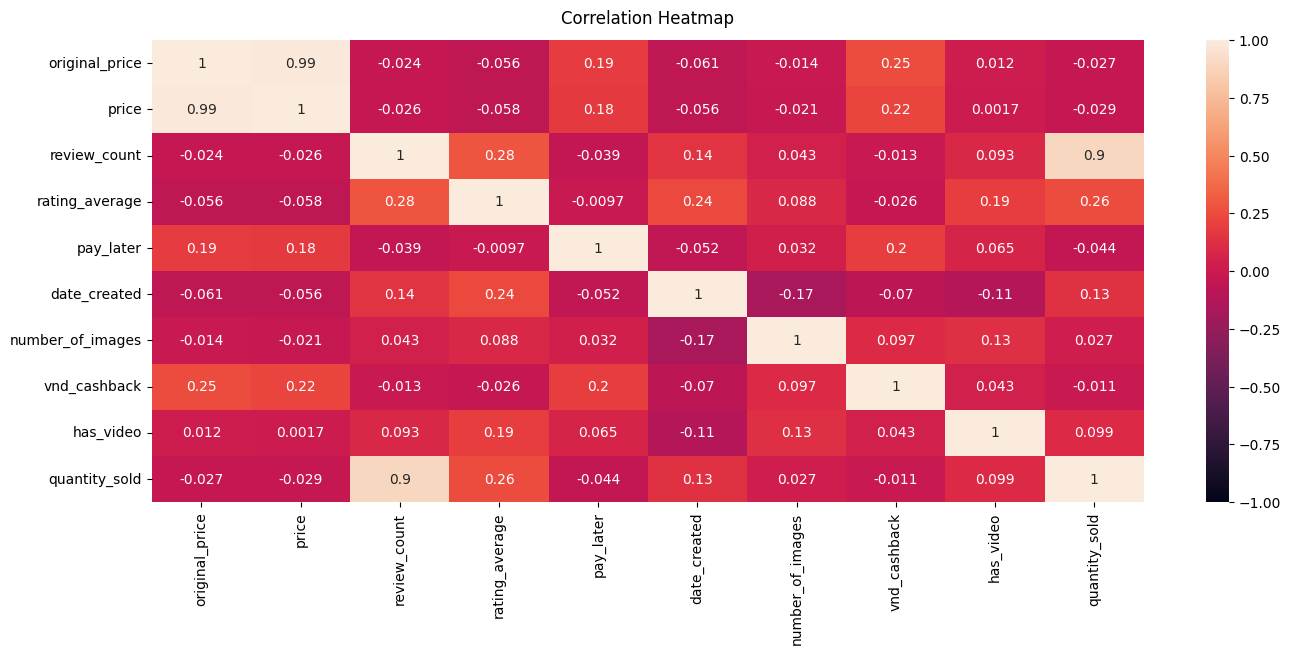

In [32]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(women_bags.drop(axis = 1,
                            columns = ['fulfillment_type', 'brand', 'category', 'bags', 'gender','favourite_count'])
            .corr(),
            vmin=-1, vmax=1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [34]:
import numpy as np

In [35]:
np.set_printoptions(suppress = True)
pd.set_option('display.float_format', lambda x : "%.2f"%x)

In [36]:
women_bags.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Crossbody bag for walking around town,224.00,67418.50,56676.31,10000.00,37721.25,48000.00,51370.00,299000.00
Fashion,359.00,147299.67,260591.08,4749.00,49000.00,75000.00,142500.00,2850000.00
Large handbag,210.00,1594307.49,3533942.21,9499.00,199000.00,376180.00,899000.00,17500000.00
Office crossbody bag,218.00,724999.76,933318.87,15199.00,179750.00,326000.00,866500.00,5000000.00
Root,2159.00,134028.93,291980.07,1000.00,38727.00,62500.00,119000.00,4380000.00
Short wallet,247.00,164776.62,232777.29,1000.00,36000.00,75000.00,198000.00,2077000.00
Small and medium handbags,121.00,54035.31,17144.66,14000.00,40000.00,54000.00,69000.00,99500.00
Tote bag with lock,193.00,236003.15,460027.64,9000.00,59000.00,86000.00,246000.00,4990000.00
Unlocked tote bag,155.00,142418.97,377987.99,0.00,45975.00,65000.00,109850.00,3390000.00


In [37]:
women_bags.groupby('category')['quantity_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Crossbody bag for walking around town,224.00,3.88,15.84,0.00,0.00,0.00,1.00,170.00
Fashion,359.00,25.57,82.87,0.00,0.00,3.00,15.00,1020.00
Large handbag,210.00,4.71,33.74,0.00,0.00,0.00,1.75,479.00
Office crossbody bag,218.00,2.91,8.47,0.00,0.00,0.00,1.75,55.00
Root,2159.00,2.22,10.69,0.00,0.00,0.00,1.00,247.00
Short wallet,247.00,55.04,160.28,0.00,0.00,5.00,25.00,1239.00
Small and medium handbags,121.00,2.93,9.56,0.00,0.00,0.00,2.00,61.00
Tote bag with lock,193.00,6.77,35.90,0.00,0.00,0.00,3.00,353.00
Unlocked tote bag,155.00,8.74,32.29,0.00,0.00,1.00,6.00,328.00


In [38]:
women_bags['discount_rate'] = (women_bags['original_price'] - women_bags['price']) / women_bags['original_price']
women_bags['discount_rate'].describe()

,discount_rate
count,4150.00
mean,0.05
std,0.13
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.69


<Figure size 1600x600 with 0 Axes>

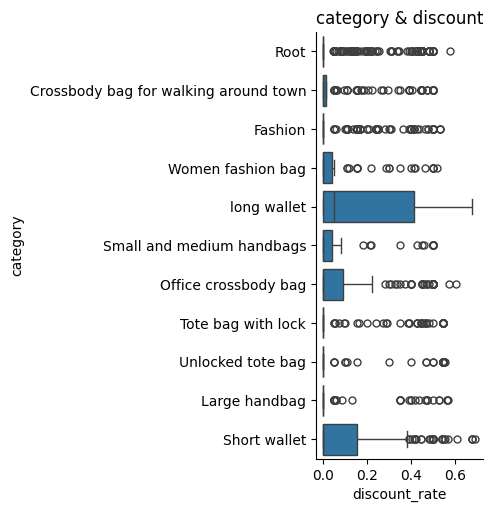

In [39]:
plt.figure(figsize=(16, 6))
box = sns.catplot(data = women_bags, x = 'discount_rate', y = 'category',kind = 'box')
box.set(title = 'category & discount');

In [40]:
women_bags.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Crossbody bag for walking around town,224.00,67418.50,56676.31,10000.00,37721.25,48000.00,51370.00,299000.00
Fashion,359.00,147299.67,260591.08,4749.00,49000.00,75000.00,142500.00,2850000.00
Large handbag,210.00,1594307.49,3533942.21,9499.00,199000.00,376180.00,899000.00,17500000.00
Office crossbody bag,218.00,724999.76,933318.87,15199.00,179750.00,326000.00,866500.00,5000000.00
Root,2159.00,134028.93,291980.07,1000.00,38727.00,62500.00,119000.00,4380000.00
Short wallet,247.00,164776.62,232777.29,1000.00,36000.00,75000.00,198000.00,2077000.00
Small and medium handbags,121.00,54035.31,17144.66,14000.00,40000.00,54000.00,69000.00,99500.00
Tote bag with lock,193.00,236003.15,460027.64,9000.00,59000.00,86000.00,246000.00,4990000.00
Unlocked tote bag,155.00,142418.97,377987.99,0.00,45975.00,65000.00,109850.00,3390000.00


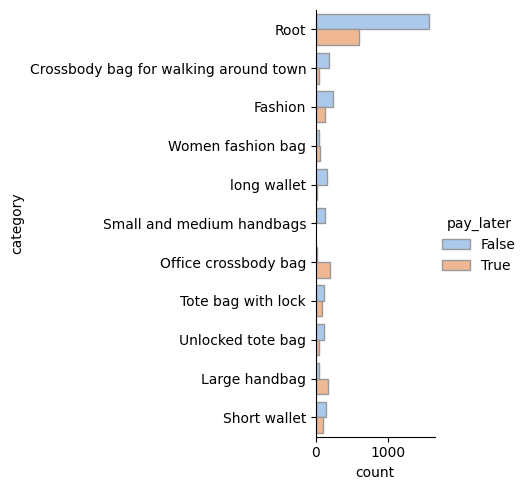

In [41]:
sns.catplot(
    data=women_bags, y="category", hue="pay_later", kind="count",
    palette="pastel", edgecolor=".6",
)

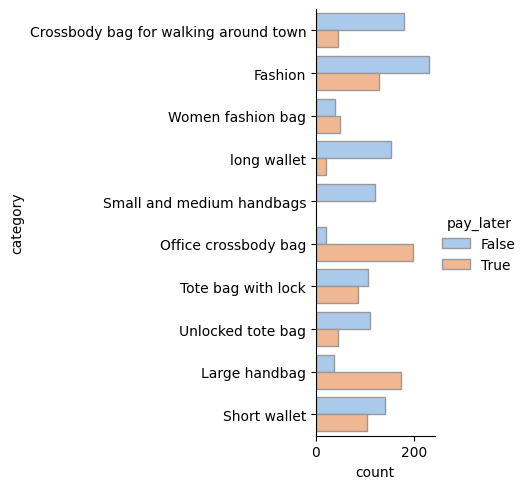

In [42]:
filter_data = women_bags[women_bags['category'] != 'Root']
sns.catplot(
    data= filter_data, y="category", hue="pay_later", kind="count",
    palette="pastel", edgecolor=".6",
)

In [43]:
women_bags.groupby('fulfillment_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
fulfillment_type,,,,,,,,
dropship,4087.00,232546.83,920343.08,0.00,40920.00,69000.00,159000.00,17500000.00
instant_delivery,1.00,10000.00,NaN,10000.00,10000.00,10000.00,10000.00,10000.00
seller_delivery,32.00,2539609.38,2017224.12,50400.00,649000.00,2436500.00,3890000.00,7790000.00
tiki_delivery,31.00,202166.13,229521.28,46550.00,84000.00,130000.00,222500.00,1179000.00


<Figure size 1600x600 with 0 Axes>

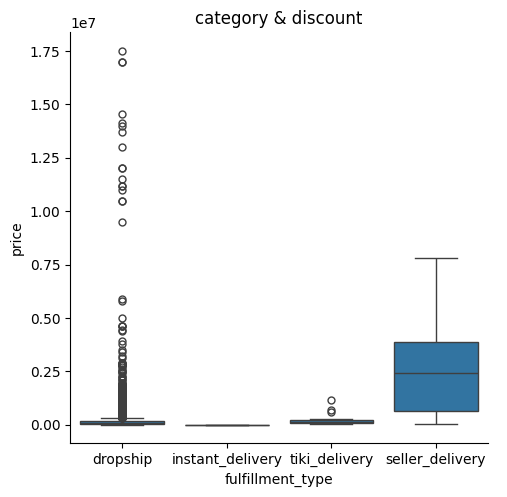

In [44]:
plt.figure(figsize=(16, 6))
box = sns.catplot(data = women_bags, x = 'fulfillment_type', y = 'price',kind = 'box')
box.set(title = 'category & discount');

In [45]:
women_bags.groupby('category')['rating_average'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Crossbody bag for walking around town,224.00,0.70,1.66,0.00,0.00,0.00,0.00,5.00
Fashion,359.00,2.18,2.21,0.00,0.00,1.00,4.50,5.00
Large handbag,210.00,1.04,1.94,0.00,0.00,0.00,0.00,5.00
Office crossbody bag,218.00,1.07,1.94,0.00,0.00,0.00,0.00,5.00
Root,2159.00,0.62,1.57,0.00,0.00,0.00,0.00,5.00
Short wallet,247.00,2.47,2.34,0.00,0.00,3.80,4.80,5.00
Small and medium handbags,121.00,0.89,1.86,0.00,0.00,0.00,0.00,5.00
Tote bag with lock,193.00,1.11,1.99,0.00,0.00,0.00,1.00,5.00
Unlocked tote bag,155.00,1.29,2.05,0.00,0.00,0.00,3.35,5.00


In [46]:
def brand(x):
    if x == 'OEM':
        return 0
    else:
        return 1
women_bags['has_brand'] = women_bags['brand'].apply(brand)
women_bags['has_brand'].value_counts()

,count
has_brand,
0,3232
1,919


In [47]:
women_bags.groupby('has_brand')['quantity_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
has_brand,,,,,,,,
0,3232.00,4.60,20.39,0.00,0.00,0.00,1.00,353.00
1,919.00,25.99,119.08,0.00,0.00,1.00,5.00,1436.00


In [48]:
women_bags.groupby('has_video')['quantity_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
has_video,,,,,,,,
False,3684.00,7.25,55.37,0.00,0.00,0.00,2.00,1436.00
True,467.00,25.83,83.57,0.00,0.00,1.00,12.00,962.00


In [49]:
women_bags.groupby(['has_video', 'has_brand'])['quantity_sold'].describe()

count  mean    std  min  25%  50%   75%     max
has_video has_brand                                                  
False     0         2920.00  3.72  16.50 0.00 0.00 0.00  1.00  353.00
          1          764.00 20.73 116.30 0.00 0.00 0.00  3.00 1436.00
True      0          312.00 12.87  41.09 0.00 0.00 1.00  5.00  303.00
          1          155.00 51.92 129.21 0.00 1.00 6.00 46.50  962.00

In [50]:
women_bags.groupby('pay_later')['quantity_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
pay_later,,,,,,,,
False,2705.00,11.26,68.27,0.00,0.00,0.00,2.00,1436.00
True,1446.00,5.74,37.73,0.00,0.00,0.00,1.00,962.00


In [51]:
women_bags.groupby('pay_later')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
pay_later,,,,,,,,
False,2705.00,128301.29,1021621.75,0.00,35000.00,49000.00,69000.00,17500000.00
True,1446.00,477806.74,753549.56,100000.00,150000.00,250000.00,430712.50,9469000.00


In [52]:
women_bags['discount_rate'] = (women_bags['original_price'] - women_bags['price']) / women_bags['original_price']
women_bags['has_discount'] = women_bags['discount_rate'].apply(lambda x:True if x>0 else False)
women_bags['has_discount'].value_counts()

,count
has_discount,
False,3376
True,775


In [53]:
women_bags.groupby(['has_discount'])['quantity_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
has_discount,,,,,,,,
False,3376.00,6.41,53.55,0.00,0.00,0.00,1.00,1436.00
True,775.00,22.09,79.20,0.00,0.00,1.00,6.50,1020.00


In [54]:
women_bags.groupby(['has_brand', 'has_discount', 'has_video'])['quantity_sold'].describe()

count  mean    std  min  25%   50%   75%  \
has_brand has_discount has_video                                              
0         False        False     2556.00  2.96  13.66 0.00 0.00  0.00  1.00   
                       True       168.00  7.80  28.08 0.00 0.00  0.00  4.00   
          True         False      364.00  9.08  29.06 0.00 0.00  0.00  3.00   
                       True       144.00 18.78  51.82 0.00 0.00  1.00  6.25   
1         False        False      566.00 19.91 124.60 0.00 0.00  0.00  2.00   
                       True        86.00 17.50  42.45 0.00 0.00  2.00 12.75   
          True         False      198.00 23.06  88.61 0.00 0.00  1.00  6.00   
                       True        69.00 94.83 179.42 0.00 2.00 20.00 87.00   

                                     max  
has_brand has_discount has_video          
0         False        False      353.00  
                       True       240.00  
          True         False      310.00  
                       True       303.00  
1         False        False     1436.00  
                       True       278.00  
          True         False     1020.00  
                       True       962.00

In [55]:
women_bags['quantity_sold'].describe()

,quantity_sold
count,4151.00
mean,9.34
std,59.49
min,0.00
25%,0.00
50%,0.00
75%,2.00
max,1436.00
